In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CICIDS = pd.read_csv("CICIDS2017_Modified.csv")
plt.style.use('seaborn-v0_8-darkgrid')

In [4]:
# Make sure figure is consistent 2x2
fig = plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

Text(0, 0.5, 'Attack Type')

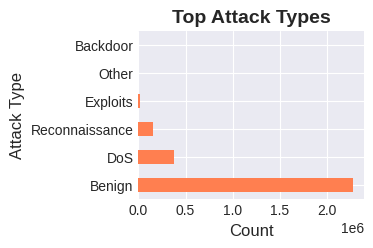

In [5]:
# 1. Distribution of attack types
ax1 = plt.subplot(2, 2, 1)
CICIDS['attack_group'].value_counts().head(10).plot(kind='barh', ax=ax1, color='coral')
ax1.set_title('Top Attack Types', fontweight='bold', fontsize=14)
ax1.set_xlabel('Count', fontsize=12)
ax1.set_ylabel('Attack Type', fontsize=12)

[Text(0, 0, 'http'),
 Text(1, 0, 'dns'),
 Text(2, 0, '-'),
 Text(3, 0, 'ssh'),
 Text(4, 0, 'ftp'),
 Text(5, 0, 'smb'),
 Text(6, 0, 'smtp'),
 Text(7, 0, 'rdp'),
 Text(8, 0, 'telnet')]

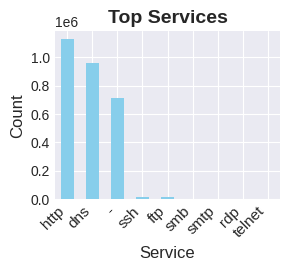

In [6]:
# 2. Service distribution
ax2 = plt.subplot(2, 2, 2)
CICIDS['service_grouped'].value_counts().head(10).plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Top Services', fontweight='bold', fontsize=14)
ax2.set_xlabel('Service', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=11)

[Text(0, 0, 'BENIGN'),
 Text(1, 0, 'DoS Hulk'),
 Text(2, 0, 'PortScan'),
 Text(3, 0, 'DDoS'),
 Text(4, 0, 'DoS GoldenEye'),
 Text(5, 0, 'FTP-Patator'),
 Text(6, 0, 'SSH-Patator'),
 Text(7, 0, 'DoS slowloris'),
 Text(8, 0, 'DoS Slowhttptest'),
 Text(9, 0, 'Bot'),
 Text(10, 0, 'Web Attack ï¿½ Brute Force'),
 Text(11, 0, 'Web Attack ï¿½ XSS'),
 Text(12, 0, 'Infiltration'),
 Text(13, 0, 'Web Attack ï¿½ Sql Injection'),
 Text(14, 0, 'Heartbleed')]

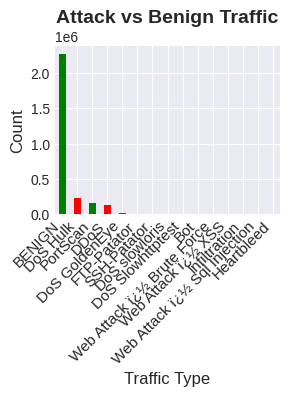

In [28]:
# 3. Attack/Benign distribution
ax3 = plt.subplot(2, 2, 3)
CICIDS['Label'].value_counts().plot(kind='bar', ax=ax3, color=['green', 'red'])
ax3.set_title('Attack vs Benign Traffic', fontweight='bold', fontsize=14)
ax3.set_xlabel('Traffic Type', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=11)

[Text(0, 0, 'instant'),
 Text(1, 0, 'long'),
 Text(2, 0, 'medium'),
 Text(3, 0, 'short'),
 Text(4, 0, 'unknown')]

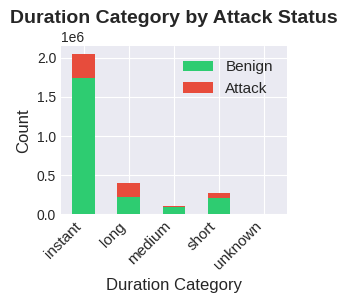

In [21]:
# 4. Duration category distribution by attack status
ax4 = plt.subplot(2, 2, 4)
pd.crosstab(CICIDS['dur_category'], CICIDS['is_attack']).plot(kind='bar', stacked=True, ax=ax4, color=['#2ecc71', '#e74c3c'])
ax4.set_title('Duration Category by Attack Status', fontweight='bold', fontsize=14)
ax4.set_xlabel('Duration Category', fontsize=12)
ax4.set_ylabel('Count', fontsize=12)
ax4.legend(['Benign', 'Attack'], fontsize=11)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right', fontsize=11)

In [10]:
# Additional figure for network characteristics
fig2 = plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

Text(0, 0.5, 'Port')

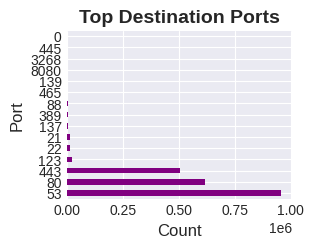

In [27]:
# 5. Port distribution (ranked off top destination ports)
ax5 = plt.subplot(2, 2, 1)
CICIDS['Destination Port'].value_counts().head(15).plot(kind='barh', ax=ax5, color='purple')
ax5.set_title('Top Destination Ports', fontweight='bold', fontsize=14)
ax5.set_xlabel('Count', fontsize=12)
ax5.set_ylabel('Port', fontsize=12)

[Text(0, 0, 'Completed'), Text(1, 0, 'Failed')]

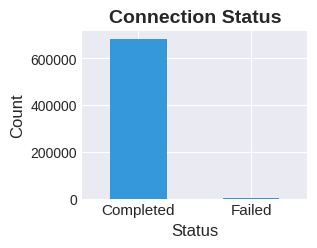

In [26]:
# 6. Binary connection status distribution
ax6 = plt.subplot(2, 2, 2)
connection_data = pd.DataFrame({
    'Completed': [CICIDS['connection_completed'].sum()],
    'Failed': [CICIDS['connection_failed'].sum()]
})
connection_data.T.plot(kind='bar', ax=ax6, color=['#3498db', '#e67e22'], legend=False)
ax6.set_title('Connection Status', fontweight='bold', fontsize=14)
ax6.set_xlabel('Status', fontsize=12)
ax6.set_ylabel('Count', fontsize=12)
ax6.set_xticklabels(['Completed', 'Failed'], rotation=0, fontsize=11)

[Text(0, 0, 'small'),
 Text(1, 0, 'unknown'),
 Text(2, 0, 'large'),
 Text(3, 0, 'medium'),
 Text(4, 0, 'very_large')]

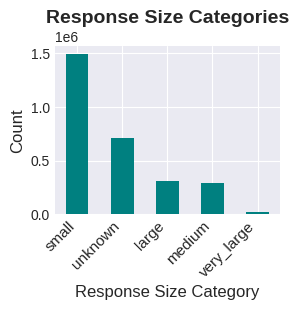

In [14]:
# 7. Response size category distribution
ax7 = plt.subplot(2, 2, 3)
CICIDS['response_size_cat'].value_counts().plot(kind='bar', ax=ax7, color='teal')
ax7.set_title('Response Size Categories', fontweight='bold', fontsize=14)
ax7.set_xlabel('Response Size Category', fontsize=12)
ax7.set_ylabel('Count', fontsize=12)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45, ha='right', fontsize=11)

[Text(0, 0, 'Symmetric'), Text(1, 0, 'Asymmetric')]

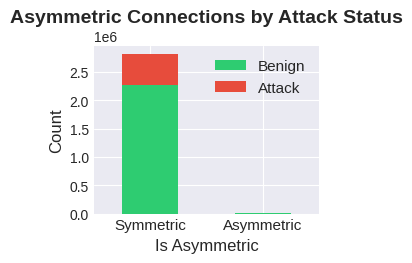

In [15]:
# 8. Asymmetric vs Symmetric connections by attack status
ax8 = plt.subplot(2, 2, 4)
pd.crosstab(CICIDS['is_asymmetric'], CICIDS['is_attack']).plot(kind='bar', stacked=True, ax=ax8, color=['#2ecc71', '#e74c3c'])
ax8.set_title('Asymmetric Connections by Attack Status', fontweight='bold', fontsize=14)
ax8.set_xlabel('Is Asymmetric', fontsize=12)
ax8.set_ylabel('Count', fontsize=12)
ax8.legend(['Benign', 'Attack'], fontsize=11)
ax8.set_xticklabels(['Symmetric', 'Asymmetric'], rotation=0, fontsize=11)

In [16]:
# Additional figure for TCP flags and packet characteristics
fig3 = plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

[Text(0, 0, 'SYN'),
 Text(1, 0, 'ACK'),
 Text(2, 0, 'FIN'),
 Text(3, 0, 'RST'),
 Text(4, 0, 'PSH'),
 Text(5, 0, 'URG')]

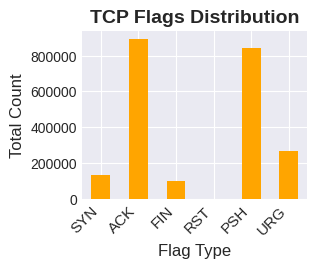

In [22]:
# 9. Distribbution of TCP flags within CICIDS
ax9 = plt.subplot(2, 2, 1)
flag_data = pd.DataFrame({
    'SYN': [CICIDS['SYN Flag Count'].sum()],
    'ACK': [CICIDS['ACK Flag Count'].sum()],
    'FIN': [CICIDS['FIN Flag Count'].sum()],
    'RST': [CICIDS['RST Flag Count'].sum()],
    'PSH': [CICIDS['PSH Flag Count'].sum()],
    'URG': [CICIDS['URG Flag Count'].sum()]
})
flag_data.T.plot(kind='bar', ax=ax9, color='orange', legend=False)
ax9.set_title('TCP Flags Distribution', fontweight='bold', fontsize=14)
ax9.set_xlabel('Flag Type', fontsize=12)
ax9.set_ylabel('Total Count', fontsize=12)
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=45, ha='right', fontsize=11)

[Text(0, 0, 'Normal Jitter'), Text(1, 0, 'High Jitter')]

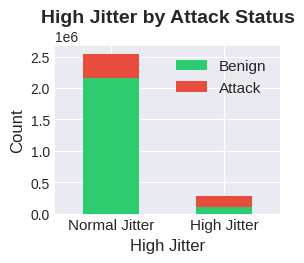

In [23]:
# 10. Connections w/ high/normal jitter
ax10 = plt.subplot(2, 2, 2)
pd.crosstab(CICIDS['high_jitter'], CICIDS['is_attack']).plot(kind='bar', stacked=True, ax=ax10, color=['#2ecc71', '#e74c3c'])
ax10.set_title('High Jitter by Attack Status', fontweight='bold', fontsize=14)
ax10.set_xlabel('High Jitter', fontsize=12)
ax10.set_ylabel('Count', fontsize=12)
ax10.legend(['Benign', 'Attack'], fontsize=11)
ax10.set_xticklabels(['Normal Jitter', 'High Jitter'], rotation=0, fontsize=11)

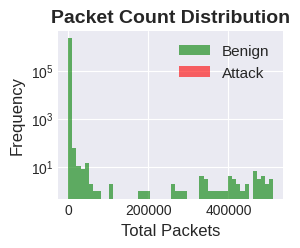

In [24]:
# 11. Packets total distribution (y-axis log scaled)
ax11 = plt.subplot(2, 2, 3)
CICIDS[CICIDS['is_attack'] == 0]['packets_total'].plot(kind='hist', bins=50, ax=ax11, alpha=0.6, color='green', label='Benign')
CICIDS[CICIDS['is_attack'] == 1]['packets_total'].plot(kind='hist', bins=50, ax=ax11, alpha=0.6, color='red', label='Attack')
ax11.set_title('Packet Count Distribution', fontweight='bold', fontsize=14)
ax11.set_xlabel('Total Packets', fontsize=12)
ax11.set_ylabel('Frequency', fontsize=12)
ax11.legend(fontsize=11)
ax11.set_yscale('log')

[Text(0, 0, 'First Time'), Text(1, 0, 'Repeated')]

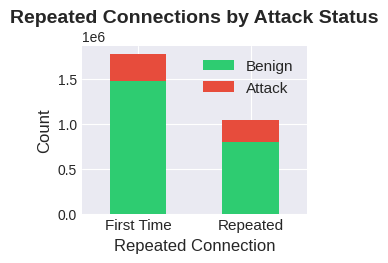

In [20]:
# 12. Repeated connections by attack status
ax12 = plt.subplot(2, 2, 4)
pd.crosstab(CICIDS['repeated_connection'], CICIDS['is_attack']).plot(kind='bar', stacked=True, ax=ax12, color=['#2ecc71', '#e74c3c'])
ax12.set_title('Repeated Connections by Attack Status', fontweight='bold', fontsize=14)
ax12.set_xlabel('Repeated Connection', fontsize=12)
ax12.set_ylabel('Count', fontsize=12)
ax12.legend(['Benign', 'Attack'], fontsize=11)
ax12.set_xticklabels(['First Time', 'Repeated'], rotation=0, fontsize=11)